# Machine Learning Engineer Nanodegree
## Capstone Project
## Predict College Earning Potential

## Getting Started

Dataset: https://collegescorecard.ed.gov/data/Most-Recent-Cohorts-All-Data-Elements.csv

Documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

Data Dictionary: https://collegescorecard.ed.gov/data/CollegeScorecardDataDictionary.xlsx

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")

# Success - Display sample record
display(data.head(n=5))
data.info()
data.describe()


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,9,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.61638362831858,NaN,0.41664791666666,NaN,0.200384,NaN,2086.0,NaN,0.20038350910834,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.80765744125326,NaN,0.58823529411764,NaN,0.241619,NaN,2740.0,NaN,0.24161927007299,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.111111,NaN,18.0,NaN,PrivacySuppressed,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.78698579881656,NaN,0.50876842105263,NaN,0.332677,NaN,1539.0,NaN,0.33267738791423,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.58470804331013,NaN,0.43181818181818,NaN,0.000000,NaN,2539.0,NaN,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 1825 entries, UNITID to TRANS_L4_POOLED_SUPP
dtypes: float64(518), int64(13), object(1294)
memory usage: 105.7+ MB


,UNITID,OPEID,OPEID6,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED
count,7.593000e+03,7.593000e+03,7593.000000,7286.00000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,...,2341.000000,3801.000000,1550.000000,2224.000000,6142.000000,3774.000000,2505.000000,3890.000000,2505.000000,3890.000000
mean,1.765726e+06,1.910166e+06,16441.276307,1.89720,0.009614,0.738312,7.185566,1.810088,2.202292,2.192282,...,1292.946177,452.058406,70.456129,418.223921,2.367633,3.020668,0.093868,0.046405,1430.354092,587.385861
std,6.771661e+06,3.516382e+06,14088.868371,0.87879,0.097586,0.439583,21.184166,1.031903,1.318152,0.835941,...,2171.869210,982.988683,201.293767,949.621790,0.774732,0.999919,0.145275,0.085976,4776.754663,1293.440977
min,1.006540e+05,1.002000e+05,1002.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
25%,1.752630e+05,3.402000e+05,3395.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,90.000000,49.000000,8.000000,29.000000,2.000000,2.000000,0.000000,0.000000,204.000000,75.000000
50%,2.318730e+05,1.054211e+06,10490.000000,2.00000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,521.000000,101.000000,29.000000,64.000000,2.000000,4.000000,0.000000,0.000000,627.000000,189.500000
75%,4.496120e+05,3.010617e+06,26092.000000,3.00000,0.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,1344.000000,385.000000,58.000000,353.500000,2.000000,4.000000,0.166667,0.054211,1491.000000,657.750000
max,4.862110e+07,8.209884e+07,42542.000000,3.00000,1.000000,1.000000,135.000000,4.000000,4.000000,3.000000,...,18519.000000,16660.000000,4284.000000,15691.000000,4.000000,4.000000,1.000000,0.714286,218149.000000,47432.000000


In [2]:

#S elected Features
data = data[['MN_EARN_WNE_INC2_P10', 'NUM4_PUB', 'INEXPFTE', 'CONTROL', 'SATVRMID','SATMTMID','COSTT4_A','ADM_RATE_ALL','C150_4', 'RET_FT4_POOLED']]

# Remove non numeric values
data['MN_EARN_WNE_INC2_P10'] = data['MN_EARN_WNE_INC2_P10'].apply(pd.to_numeric, errors='coerce')

# There are 2 type of Private universities 2 and 3. For our calculation they are same
data['CONTROL'] = data['CONTROL'].apply(lambda x: 1 if (x==1) else 2)

# Remove NaN records
data.dropna(inplace=True)
data.columns = ['Earning', 'NoStudents', 'UnivSpending', 'UnivType', 'SATMath', 'SATRead', 'StudentCost', 'AdmissionRate', 'Completionrate', 'RetentionRate']

# Display sample records
display(data.head(n=5))
data.describe()

,Earning,NoStudents,UnivSpending,UnivType,SATMath,SATRead,StudentCost,AdmissionRate,Completionrate,RetentionRate
0,35500.0,743.0,7941.0,1,427.0,420.0,20809.0,0.653841,0.3081,0.616384
1,45900.0,955.0,17548.0,1,575.0,594.0,22232.0,0.604275,0.5462,0.807657
3,53400.0,331.0,10619.0,1,585.0,615.0,20999.0,0.811971,0.4935,0.786986
4,30700.0,570.0,7742.0,1,410.0,410.0,18100.0,0.463858,0.2696,0.584708
5,50100.0,1282.0,10312.0,1,545.0,550.0,27205.0,0.535867,0.6709,0.865822


,Earning,NoStudents,UnivSpending,UnivType,SATMath,SATRead,StudentCost,AdmissionRate,Completionrate,RetentionRate
count,448.000000,448.000000,448.000000,448.0,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,47238.392857,1038.589286,9676.296875,1.0,512.169643,524.897321,21166.167411,0.682814,0.511222,0.768067
std,8848.756487,805.681157,4378.046492,0.0,55.772049,62.385990,4059.443911,0.168965,0.170033,0.096141
min,29800.000000,54.000000,3121.000000,1.0,370.000000,380.000000,12151.000000,0.168836,0.108900,0.488141
25%,41100.000000,387.500000,7039.750000,1.0,475.000000,485.000000,18452.500000,0.582301,0.397175,0.703396
50%,46200.000000,828.500000,8591.000000,1.0,505.000000,515.000000,20949.500000,0.690453,0.493250,0.766676
75%,51300.000000,1476.750000,10817.500000,1.0,545.250000,555.000000,23340.000000,0.805161,0.632250,0.840963
max,95900.000000,3975.000000,43996.000000,1.0,680.000000,745.000000,34496.000000,1.000000,0.933000,0.972121


In [3]:
# Total number of records
n_records = len(data)

# Number of records where earnings is more than $50,000
n_greater_50k = len(data[data.Earning>=50000])

# Number of records where earnings is at most $50,000
n_at_most_50k = len(data[data.Earning<50000])

# Percentage of individuals whose earnings is more than $50,000
greater_percent = n_greater_50k/float(n_records) * 100.00

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 448
Individuals making more than $50,000: 150
Individuals making at most $50,000: 298
Percentage of individuals making more than $50,000: 33.48%


** Featureset Exploration **

The dataset is provided bu the US Department of Education (https://collegescorecard.ed.gov/). It is provided as a CSV file. The dataset consists of approximately 7593 data points, with each datapoint having 1825 features.

But for the purpose of this project 9 features have been selected with 1 target variable, as these seem to be more appropriate for the problem at hand.

    Features

    CONTROL: integer : Collge type (1-Public/2&3-Private)
    ADM_RATE: float : Admission Rate
    SATVRMID: float: Average SAT score in English
    SATMTMID: float : Average SAT score in Math
    COSTT4_A: integer : Average cost to complete education
    C150_4: float: The degree completion rate
    RET_FT4_POOLED: float: Student retention rate
    NUM4_PUB: integer : Total number of enrolled students (indicates size)
    INEXPFTE: integer: Instructional expenditure per student
    
    Target Variable

    MN_EARN_WNE_INC2_P10: float: Mean earnings of students 10 years after entry (<=50K, >50K)

----
## Preparing the Data

Some of the data records do not have information for the target variable, Earnings, as it is privacy protedted. The value is mentioned as "PrivacyProtected". Need to drop those records.

Some records had several values for the features as invalid (NaN). Need to dop those records to make sure the analysis was close a possible to real data.


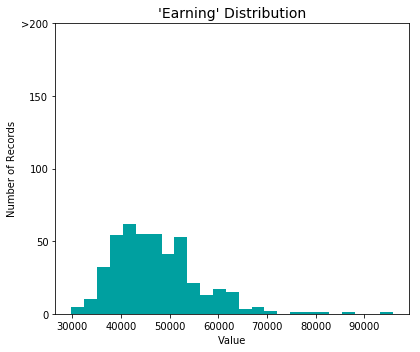

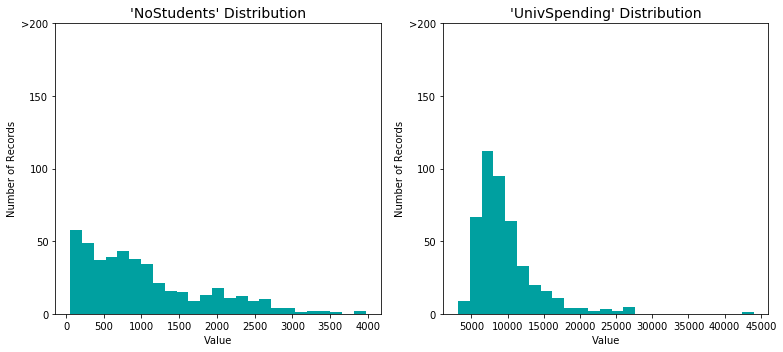

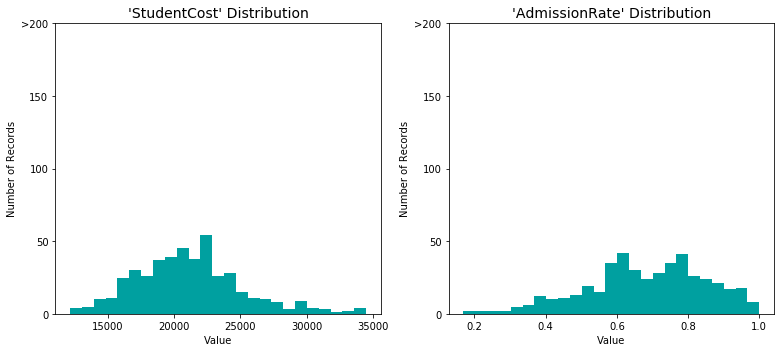

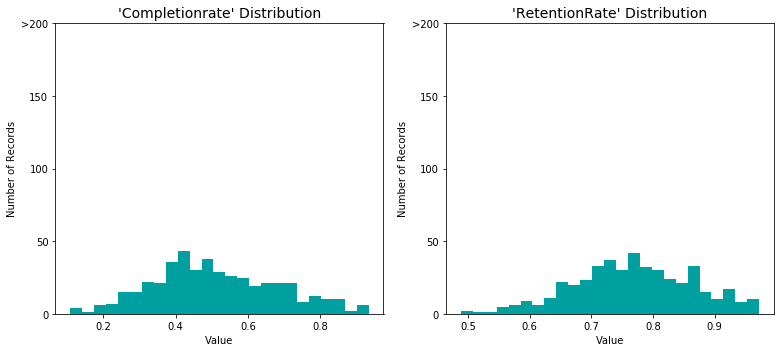

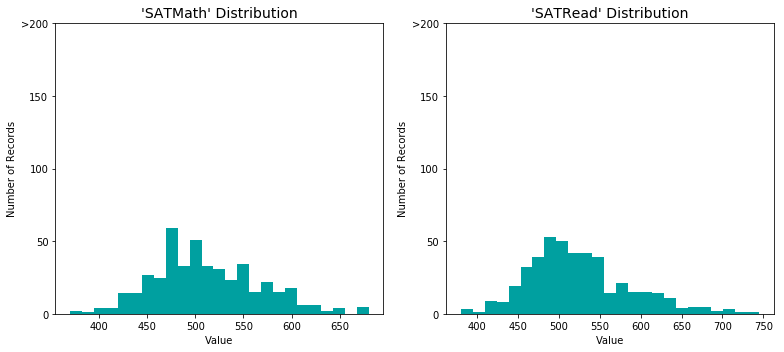

In [4]:
# Split the data into features and target label
earnings_raw = data['Earning']
vs.distribution(['Earning'], data)

features_raw = data.drop('Earning', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(['NoStudents', 'UnivSpending'], data)
vs.distribution(['StudentCost', 'AdmissionRate'], data)
vs.distribution(['Completionrate', 'RetentionRate'], data)
vs.distribution(['SATMath', 'SATRead'], data)

The distributions for number of students and university spending on students is highly skewed to the left. Hence have to do log-transformation for these features so they do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.

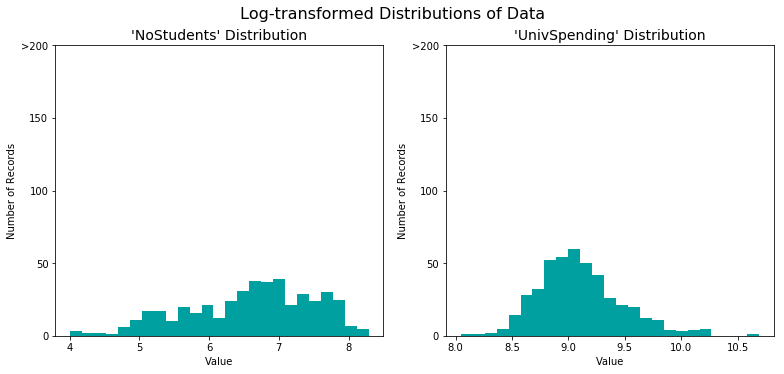

In [5]:
# Log-transform the skewed features
skewed = ['NoStudents', 'UnivSpending']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(skewed, features_log_transformed, transformed = True)

### Normalizing Numerical Features

Also need to normalization for the features, since they are numerical, so that each feature is treated equally when applying supervised learners


In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['NoStudents', 'UnivSpending', 'UnivType', 'SATMath', 'SATRead', 'StudentCost', 'AdmissionRate', 'Completionrate', 'RetentionRate']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of 5 records with scaling applied
display(features_log_minmax_transform.head(n = 5))

,NoStudents,UnivSpending,UnivType,SATMath,SATRead,StudentCost,AdmissionRate,Completionrate,RetentionRate
0,0.608477,0.352916,0.0,0.183871,0.109589,0.387469,0.583525,0.241718,0.264975
1,0.667046,0.652590,0.0,0.661290,0.586301,0.451152,0.523891,0.530639,0.660185
3,0.419979,0.462747,0.0,0.693548,0.643836,0.395972,0.773776,0.466691,0.617473
4,0.546653,0.343324,0.0,0.129032,0.082192,0.266234,0.354951,0.195001,0.199527
5,0.735773,0.451659,0.0,0.564516,0.465753,0.673708,0.441587,0.681956,0.780364


### Implementation: Data Preprocessing

Finally since need to frame this as a classification problem, encode the target variable Earnings to 1 if >=50000 and 0 if <50000.
One-hope encoding not needed as all values are numeric.

In [9]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
#features_final = pd.get_dummies(features_log_minmax_transform)
features_final = features_log_minmax_transform

# Encode the 'Earnings' data to values 0/1 for classification
earnings = earnings_raw.apply(lambda x: 1 if (x>=50000) else 0)

# Print the number of features after one-hot encoding
#encoded = list(features_final.columns)
#print("{} total features after one-hot encoding.".format(len(encoded)))


### Shuffle and Split Data
Split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [10]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'earnings' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    earnings, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 358 samples.
Testing set has 90 samples.


----
## Evaluating Model Performance

### 1. Naive Predictor Performace
The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. This is becaue I could not find any free historically similar research. In Naive predictor methodology I assume everyone earns above $50,000 and generate accuracy scores.

In [11]:
'''
TP = np.sum(earnings) # Counting the ones as this is the naive case. 
FP = earnings.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(earnings)
FP = earnings.count() - TP
TN = 0
FN = 0

# Calculate accuracy, precision and recall
accuracy = TP/earnings.count()
precision = TP/(TP+FP) 
recall = TP/(TP+FN)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
fscore = (1+beta**2) * (precision*recall)/((beta**2*precision)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3348, F-score: 0.3862]


###  Supervised Learning Models

- AdaBoost
- Random Forest
- Gradient Boosting

### 2 - Model Application
Based on http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html and http://scikit-learn.org/stable/modules/ensemble.html I am thinking of using Ensemble Methods sequentail boosting (AdaBoost, Gradient Boost) and parallel bagging(RandomForest). 
This is because these classifiers make use of a base classifier (here DecisionTree as default) and improve on that. 
Error = Bias (where the algorithm cannot learn the target) + Variance (comes from sampling)

RandomForest (Bagging):
It is based on fully grown decision trees (low bias, high variance). Bagging reduces error mainly by reducing variance (but not bias) by making the trees uncorrelated. The main weakness is it needs fully grown trees hence increases computational complexity of the model. Can be slow to score as the complexity increases. Its main strength is ability to handle outliers and noise. Also it works fast and off the shelf and typically avoids overfitting. This is a good model for the data as the dataset is not too large or complex and is generally considered a safe bet.

AdaBoost, GradientBoost (Boosting):
Boosting is based on weak learners (high bias, low variance).Boosting reduces error mainly by reducing bias (and also to some extent variance), by aggregating the output from many models. Its main weakness is inability to handle outliers and noise and can overfit. It is complex to do tuning with several hyperparameters and finding a stopping point, But it performs well with higher complexities and is fast. They give better results but much harder to train. These are good models for the data as they are very powerful and as the data has been preprocessed for outliers. I guess GradientBoosting is used in most winning Kaggle competitions for a reason.

GradientBoost can be thought of a specific type of AdaptiveBoosting. The main difference is in AdaBoost boosting is done by increasing the weight of incorrect observations so subsequent iterations concentrate on those, whereas in GradientBoost gradient descent logic is used to minimize the loss function when adding trees. In a sense GradientBoost is generic enough to be used for more situations than AdaBoost.



### Implementation - Creating a Training and Predicting Pipeline

In [12]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: earnings training set
       - X_test: features testing set
       - y_test: earnings testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

RandomForestClassifier trained on 3 samples.
RandomForestClassifier trained on 35 samples.
RandomForestClassifier trained on 358 samples.
AdaBoostClassifier trained on 3 samples.
AdaBoostClassifier trained on 35 samples.
AdaBoostClassifier trained on 358 samples.
GradientBoostingClassifier trained on 3 samples.
GradientBoostingClassifier trained on 35 samples.
GradientBoostingClassifier trained on 358 samples.


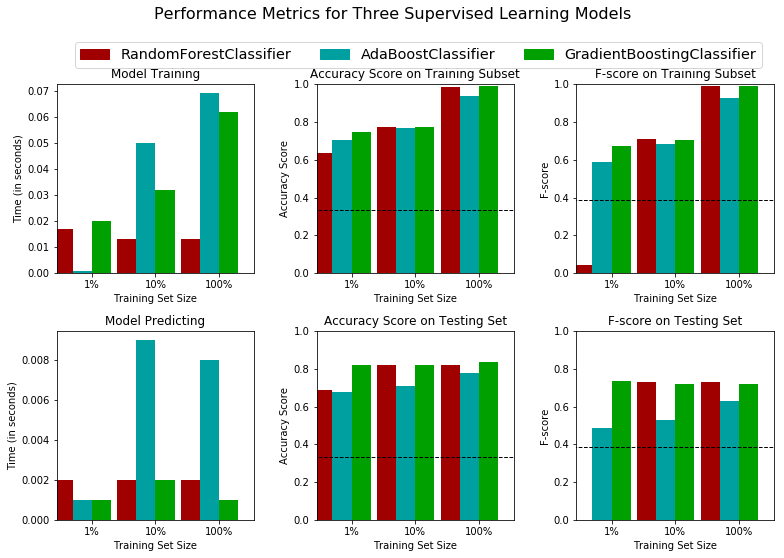

In [32]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Initialize the three models
clf_A = RandomForestClassifier(random_state=1)
clf_B = AdaBoostClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results

### 3 - Choosing the Best Model

Best Model : GradientBoost Classifier has the highest score with less time.

GradientBoost has higher F-score and Accuracy than AdaBoostin with Testing set and Trainming set. It also took more time than AdaBoost.
Surprisingly, RandomForest did as good as Boosting alborithms in Training and took less time too. RandomForest did as good as GradientBost with slightly less accuracy scores and slightly more time during testing.

### 4 - Implementation: Model Tuning

In [33]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = GradientBoostingClassifier(random_state=1)

# Create the parameters list to tune
parameters = {
              'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators' :[25,50,70],
              'max_depth' : [1,3,9],
              #'min_samples_leaf': [3, 5, 7]
              #'min_samples_split' : [3,4,5]
              }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Un

Unoptimized model
------
Accuracy score on testing data: 0.8333
F-score on testing data: 0.7194

Optimized Model
------
Final accuracy score on the testing data: 0.8444
Final F-score on the testing data: 0.7407


### 5 - Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8333         |     0.8444      |
| F-score        |    0.7194         |     0.7407      |



----
## Feature Importance


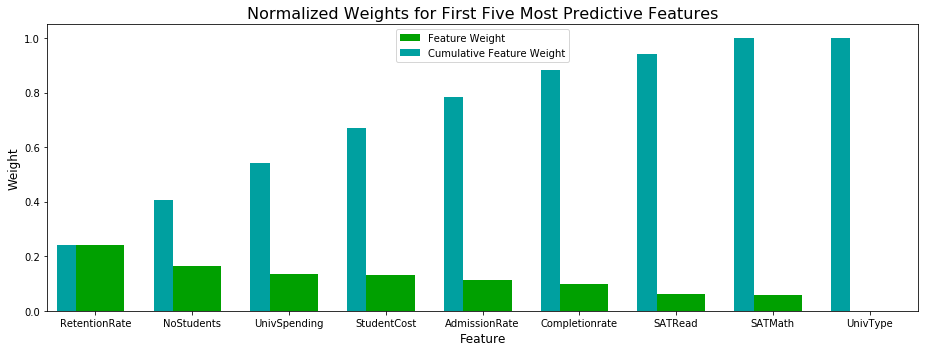

In [34]:
# Import a supervised learning model that has 'feature_importances_'
# Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier().fit(X_train,y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Feature Selection
Finallycheck how the model will perform if only the top five important features were used to train.

In [35]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8444
F-score on testing data: 0.7407

Final Model trained on reduced data
------
Accuracy on testing data: 0.8556
F-score on testing data: 0.7634


### 8 - Effects of Feature Selection

The Final optimized model scores are Accuracy 0.8556 and F-score 0.7634
The Optimized model with feature selection is better than the Optimized model which is better than the unoptimized model.
But it has much better scores than benchmark (Accuracy-0.3348, F-score: 0.3862)

#### Results:

|     Metric     | Unoptimized Model | Optimized Model | Optimized(Feature) Model |
| :------------: | :---------------: | :-------------: | :----------------------: |
| Accuracy Score |    0.8333         |     0.8444      |       0.8556             |
| F-score        |    0.7194         |     0.7407      |       0.7634             |